In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from random import sample 
import matplotlib.cm as cm 
import imageio
import pandas as ps
from copy import deepcopy
from random import randint
from matplotlib import pyplot

# nä'r används dessa?
from scipy import linalg 
import scipy.misc 
import scipy.io 

from sklearn.datasets import make_blobs

In [52]:
# ******************* old *******************
def generate_fake_data(f_centers):
    x, y = make_blobs(n_samples=5000, centers=f_centers, n_features=2, random_state=195)
    xx = deepcopy(x)
    yy = deepcopy(y)
    return f_centers, x, xx, yy

def plot_reg_data(x):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.show()  
    
def gen_rand_cluster(nub_cluster):
    n_features = 2
    c_pos = generate_random_clusters(n_features, nub_cluster) 
    c_pos = np.array(c_pos).T
    return c_pos

def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
    return c_position

def get_centroids(x, cent_pos):
    pyplot.scatter(x[:, 0], x[:, 1])
    pyplot.scatter(cent_pos[:, 0], cent_pos[:, 1], marker='*', s=300, c='orange')
    pyplot.show()

# ******************* new *******************

# finding the closest centroids
def find_centroides(X, cent):
    idxs = np.zeros((X.shape[0],1))

    for x in range(idxs.shape[0]):
        point = X[x]
        min_dist, id_x = 9999999, 0
        for i in range(cent.shape[0]):
            cent = cent[i]
            dist = distance(cent,point)
            if dist < min_dist:
                min_dist = dist
                id_x = i
        idxs[x] = id_x
        
    return idxs

# get the squared distande
def distance(p1, p2):
    assert p1.shape == p2.shape
    return np.sum(np.square(p2-p1))

# compute cenbtroid mean
def c_centroids(X, idxs):
    sub_X = []
    for x in range(len(np.unique(idxs))):
        sub_X.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    ret = np.array([np.mean(tX,axis=0) for tX in sub_X])
    return ret

# run kmeans
def k_means(X, centroids, K):
    n_iter = 50
    cent_h = []
    curr_cent = centroids
    for myiter in range(n_iter):
        cent_h.append(curr_cent)
        idxs = find_centroides(X,centroids)
        curr_cent = c_centroids(X,idxs)
        
    return idxs, centroid_history

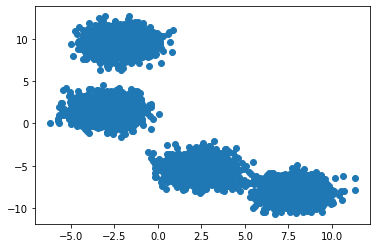

In [53]:
f_centers = 4
f_cent, x, xx, yy = generate_fake_data(f_centers)
plot_reg_data(x)

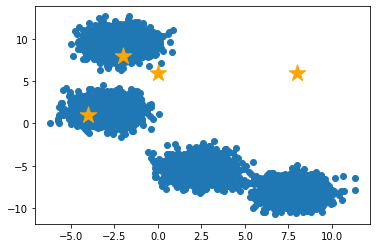

In [54]:
cc_pos = gen_rand_cluster(f_cent)
get_centroids(x, cc_pos)

In [55]:
ii = find_centroides(x, cc_pos)

AssertionError: 

In [50]:
plotData(x,cc_pos,myidxs = None)

AssertionError: 

In [49]:
def plotData(myX,mycentroids,myidxs = None):
    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert myX[0].shape == mycentroids[0][0].shape
    assert mycentroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if myidxs is not None:
        assert myidxs.shape[0] == myX.shape[0]
        subX = []
        for x in range(mycentroids[0].shape[0]):
            subX.append(np.array([myX[i] for i in range(myX.shape[0]) if myidxs[i] == x]))
    else:
        subX = [myX]
        
    fig = plt.figure(figsize=(7,5))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    tempx, tempy = [], []
    for mycentroid in mycentroids:
        tempx.append(mycentroid[:,0])
        tempy.append(mycentroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

In [ ]:
def findClosestCentroids(myX, mycentroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the # of points, n is # of features per point)
    and the (K,n) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (m,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = np.zeros((myX.shape[0],1))
    
    #Loop through each data point in X
    for x in range(idxs.shape[0]):
        mypoint = myX[x]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(mycentroids.shape[0]):
            mycentroid = mycentroids[i]
            distsquared = distSquared(mycentroid,mypoint)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        #With the best index found, modify the result idx vector
        idxs[x] = idx
        
    return idxs